# Laborator 11
<br>
Autori:
Taraburca Radu,
Vlasie Rares

 # 1.Descrierea setului de date

# 1
- Continut- o serie de sms-uri, impartite in doua categorii (spam, ham). Este un singur fisier de tip text,pe fiecare line este scris un mesaj astfel: prima coloana reprezinta una dintre cele doua categorii mentionate anterior, a doua coloana fiind mesajul in sine. 
- Provenienta:

    - O colecție de 425 de mesaje spam a fost extrasă manual de pe site-ul Web Grumbletext. Acesta este un forum din Marea Britanie în care utilizatorii de telefoane mobile fac publice reclamații despre mesajele spam prin SMS. 
    
    - Un set de 3375 SMS alese aletor din NUS SMS Corpus (NSC), care contine in aproximativ 10000 de mesaje care nu sunt spam-uri, ele au fost colectate pentru cercetari de Departamentul de Informatica al  Universitatii din Singapore. 
    
    - O serie de 450 de SMS-uri legitime(ham) colectate din lucrarea de doctorat a lui Caroline Tag 
    - Un numar de 1002 sms ham si 322 spam-uri, extrase din SMS Spam Corpus
    

In [1]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

In [2]:
path="SMSS/SMSSpamCollection"
data=pd.read_csv(path, sep="\t", header=None)

In [3]:
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
utils = CountVectorizer()
text=data[1].values
utils.fit_transform(text)
print("Cuvintele distincte din texte:",utils.vocabulary_)

Cuvintele distincte din texte: {'go': 3571, 'until': 8084, 'jurong': 4374, 'point': 5958, 'crazy': 2338, 'available': 1316, 'only': 5571, 'in': 4114, 'bugis': 1767, 'great': 3655, 'world': 8548, 'la': 4501, 'buffet': 1765, 'cine': 2061, 'there': 7694, 'got': 3615, 'amore': 1082, 'wat': 8324, 'ok': 5538, 'lar': 4537, 'joking': 4342, 'wif': 8450, 'oni': 5567, 'free': 3373, 'entry': 2963, 'wkly': 8506, 'comp': 2178, 'to': 7806, 'win': 8463, 'fa': 3100, 'cup': 2398, 'final': 3221, 'tkts': 7793, '21st': 412, 'may': 4959, '2005': 403, 'text': 7644, '87121': 794, 'receive': 6340, 'question': 6232, 'std': 7279, 'txt': 7986, 'rate': 6284, 'apply': 1169, '08452810075over18': 77, 'dun': 2815, 'say': 6679, 'so': 7074, 'early': 2836, 'hor': 3952, 'already': 1054, 'then': 7688, 'nah': 5270, 'don': 2724, 'think': 7709, 'he': 3805, 'goes': 3579, 'usf': 8130, 'lives': 4692, 'around': 1220, 'here': 3856, 'though': 7729, 'freemsg': 3380, 'hey': 3866, 'darling': 2455, 'it': 4245, 'been': 1475, 'week': 837

In [5]:
print("Vocabular sortat in ordine crescatoare: ",sorted(utils.vocabulary_.items(), key = lambda item: item[1]))

Vocabular sortat in ordine crescatoare:  [('00', 0), ('000', 1), ('000pes', 2), ('008704050406', 3), ('0089', 4), ('0121', 5), ('01223585236', 6), ('01223585334', 7), ('0125698789', 8), ('02', 9), ('0207', 10), ('02072069400', 11), ('02073162414', 12), ('02085076972', 13), ('021', 14), ('03', 15), ('04', 16), ('0430', 17), ('05', 18), ('050703', 19), ('0578', 20), ('06', 21), ('07', 22), ('07008009200', 23), ('07046744435', 24), ('07090201529', 25), ('07090298926', 26), ('07099833605', 27), ('07123456789', 28), ('0721072', 29), ('07732584351', 30), ('07734396839', 31), ('07742676969', 32), ('07753741225', 33), ('0776xxxxxxx', 34), ('07781482378', 35), ('07786200117', 36), ('077xxx', 37), ('078', 38), ('07801543489', 39), ('07808', 40), ('07808247860', 41), ('07808726822', 42), ('07815296484', 43), ('07821230901', 44), ('078498', 45), ('07880867867', 46), ('0789xxxxxxx', 47), ('07946746291', 48), ('0796xxxxxx', 49), ('07973788240', 50), ('07xxxxxxxxx', 51), ('08', 52), ('0800', 53), ('0

In [6]:
import operator
cuvinte=utils.vocabulary_
sortcuv = sorted(cuvinte.items(), key=operator.itemgetter(0))

print("Numarul de cuvinte distincte este : ", len(sortcuv))
print("Cele mai frecvente 100 de cuvinte sunt: ", sortcuv[5055:])

Numarul de cuvinte distincte este :  8713
Cele mai frecvente 100 de cuvinte sunt:  [('mind', 5055), ('minded', 5056), ('mindset', 5057), ('mine', 5058), ('minecraft', 5059), ('mini', 5060), ('minimum', 5061), ('minmobsmore', 5062), ('minmobsmorelkpobox177hp51fl', 5063), ('minmoremobsemspobox45po139wa', 5064), ('minnaminunginte', 5065), ('minor', 5066), ('mins', 5067), ('mint', 5068), ('minus', 5069), ('minute', 5070), ('minutes', 5071), ('minuts', 5072), ('miracle', 5073), ('mirror', 5074), ('mis', 5075), ('misbehaved', 5076), ('miserable', 5077), ('misfits', 5078), ('mising', 5079), ('misplaced', 5080), ('miss', 5081), ('misscall', 5082), ('missed', 5083), ('missin', 5084), ('missing', 5085), ('missionary', 5086), ('missions', 5087), ('misss', 5088), ('missunderstding', 5089), ('missy', 5090), ('mist', 5091), ('mistake', 5092), ('mistakes', 5093), ('misundrstud', 5094), ('mite', 5095), ('mitsake', 5096), ('mittelschmertz', 5097), ('miwa', 5098), ('mix', 5099), ('mj', 5100), ('mjzgroup

In [7]:
print("Lungime minima este:", len(min(cuvinte,key=len)))
print("Lungime maxima este:", len(max(cuvinte,key=len)))
print("Lungime medie este: ", sum(map(len, cuvinte))/len(cuvinte))

Lungime minima este: 2
Lungime maxima este: 34
Lungime medie este:  6.163778262366579


In [8]:
X=data[1].values
Y=data[0].values
print('Sub ce forma sunt stocate propozitiile: ', type(X))

Sub ce forma sunt stocate propozitiile:  <class 'numpy.ndarray'>


In [15]:
print('Cate propozitii sunt in subsetul de antrenare: ', len(X))

Cate propozitii sunt in subsetul de antrenare:  5572


In [18]:
print('Prima propozitie este: ', X[0])

Prima propozitie este:  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [9]:
print('Tipul de email:', Y[0])

Tipul de email: ham


In [20]:
print('Classes in set: ', np.unique(Y))

Classes in set:  ['ham' 'spam']


In [50]:
print("Samples per class in set: ",np.bincount(np.where(Y =='ham', 1, 0)))

Samples per class in set:  [ 747 4825]


In [22]:
utils2 = CountVectorizer()
utils2.fit(X)
X_transformed = utils2.fit_transform(X)

In [23]:
print('Cuvintele distincte din texte:\n', utils2.vocabulary_)

Cuvintele distincte din texte:
 {'go': 3571, 'until': 8084, 'jurong': 4374, 'point': 5958, 'crazy': 2338, 'available': 1316, 'only': 5571, 'in': 4114, 'bugis': 1767, 'great': 3655, 'world': 8548, 'la': 4501, 'buffet': 1765, 'cine': 2061, 'there': 7694, 'got': 3615, 'amore': 1082, 'wat': 8324, 'ok': 5538, 'lar': 4537, 'joking': 4342, 'wif': 8450, 'oni': 5567, 'free': 3373, 'entry': 2963, 'wkly': 8506, 'comp': 2178, 'to': 7806, 'win': 8463, 'fa': 3100, 'cup': 2398, 'final': 3221, 'tkts': 7793, '21st': 412, 'may': 4959, '2005': 403, 'text': 7644, '87121': 794, 'receive': 6340, 'question': 6232, 'std': 7279, 'txt': 7986, 'rate': 6284, 'apply': 1169, '08452810075over18': 77, 'dun': 2815, 'say': 6679, 'so': 7074, 'early': 2836, 'hor': 3952, 'already': 1054, 'then': 7688, 'nah': 5270, 'don': 2724, 'think': 7709, 'he': 3805, 'goes': 3579, 'usf': 8130, 'lives': 4692, 'around': 1220, 'here': 3856, 'though': 7729, 'freemsg': 3380, 'hey': 3866, 'darling': 2455, 'it': 4245, 'been': 1475, 'week': 83

# Implementare regresie

In [24]:
x_text, y_text=data[1].values, data[0].values

In [25]:
print(x_text)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [26]:
print(y_text)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [27]:
vect = CountVectorizer(min_df=5, stop_words='english')
#impartirea datasetului in train+validation
x1= vect.fit_transform(x_text) 
x2=vect.transform(x_text)

In [47]:
y_train=np.where(y_text =='ham', 1, 0)
y_train

array([1, 1, 0, ..., 1, 1, 1])

# KNeighborsRegressor

In [51]:
df=pd.DataFrame()

In [52]:
parameter_grid = {'n_neighbors': list(range(1,10)), 'p': [1, 2]}
grid_search = GridSearchCV(estimator =KNeighborsRegressor(), param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3, iid=False, verbose=10, n_jobs=-1)
cv_results = cross_validate(grid_search, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  37 out of  54 | elapsed:   10.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  43 out of  54 | elapsed:   10.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  49 out of  54 | elapsed:   11.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   12.0s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  37 out of  54 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  43 out of  54 | elapsed:    5.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  49 out of  54 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    7.2s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  37 out of  54 | elapsed:    5.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  43 out of  54 | elapsed:    5.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  49 out of  54 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    7.3s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  37 out of  54 | elapsed:    5.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  54 | elapsed:    6.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  49 out of  54 | elapsed:    6.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    7.6s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  37 out of  54 | elapsed:    5.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  54 | elapsed:    6.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  49 out of  54 | elapsed:    6.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    7.9s finished


In [53]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'GridSearchCv','Model':'KNeighborsRegressor()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198


In [54]:
gs_random = RandomizedSearchCV(estimator=KNeighborsRegressor(), param_distributions=parameter_grid,
                               scoring='neg_mean_squared_error', cv= 3,n_iter=15, iid=False, verbose=10, n_jobs=-1)
cv_results = cross_validate(gs_random, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    3.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    5.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.5s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:    3.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    6.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    6.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.6s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    3.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    5.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    6.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.2s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    3.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    5.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    6.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.5s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    3.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    5.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    5.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.1s finished


In [55]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'RandomizedSearchCV','Model':'KNeighborsRegressor()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198


# LogisticRegression

In [56]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid=param_grid, cv=5, n_jobs=4, scoring='neg_mean_squared_error')
cv_results = cross_validate(grid, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

In [57]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'GridSearchCV','Model':'LogisticRegression()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,-0.019922,-0.019922,0.828351,-0.004442,-0.004442,0.961752


In [58]:
gs_random = RandomizedSearchCV(estimator=LogisticRegression(solver='lbfgs', max_iter=1000), param_distributions=param_grid,
                               scoring='neg_mean_squared_error', cv= 3,n_iter=4, iid=False)
cv_results = cross_validate(gs_random, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

In [59]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'RandomizedSearchCV','Model':'LogisticRegression()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,-0.019922,-0.019922,0.828351,-0.004442,-0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,-0.019742,-0.019742,0.829900,-0.003051,-0.003051,0.973726


# DecisionTreeRegressor

In [60]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split':list(range(2,15)), 
          'min_samples_leaf':list(range(2,11)),
         }
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=5, n_jobs=4, scoring='neg_mean_squared_error', verbose=10)
cv_results = cross_validate(grid, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

Fitting 5 folds for each of 351 candidates, totalling 1755 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1829s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1627s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 180 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 284 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 344 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 404 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 47

Fitting 5 folds for each of 351 candidates, totalling 1755 fits


[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 104 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 344 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 422 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 500 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 590 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1834s.) Setting batch_size=12.
[Parallel(n_jobs=4)]: Done 680 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1225s.) Setting batch_size=38.
[Parallel(n_jobs=4)]: Done 1118 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 1755 out of 1755 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Using b

Fitting 5 folds for each of 351 candidates, totalling 1755 fits


[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 104 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 344 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 422 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 500 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 590 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1945s.) Setting batch_size=12.
[Parallel(n_jobs=4)]: Done 686 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1319s.) Setting batch_size=36.
[Parallel(n_jobs=4)]: Done 1130 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 1755 out of 1755 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Using b

Fitting 5 folds for each of 351 candidates, totalling 1755 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 368 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 456 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 560 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 664 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1867s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1567s.) Setting batch_size=40.
[Parallel(n_jobs=4)]: Done 832 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 1384 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 1755 out of 1755 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_job

Fitting 5 folds for each of 351 candidates, totalling 1755 fits


[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 104 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 344 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 422 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 500 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 590 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1892s.) Setting batch_size=12.
[Parallel(n_jobs=4)]: Done 686 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1319s.) Setting batch_size=36.
[Parallel(n_jobs=4)]: Done 1130 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 1755 out of 1755 | elapsed:    8.1s finished


In [61]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'GridSearchCV','Model':'DecisionTreeRegressor()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,-0.019922,-0.019922,0.828351,-0.004442,-0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,-0.019742,-0.019742,0.829900,-0.003051,-0.003051,0.973726
4,DecisionTreeRegressor(),GridSearchCV,8.315145,-0.042214,-0.028408,0.753056,-0.022378,-0.011189,0.903770


In [62]:
gs_random = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=params,
                               scoring='neg_mean_squared_error', cv= 3,n_iter=250, iid=False, verbose=10, n_jobs=-1)
cv_results = cross_validate(gs_random, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0332s.) Setting batch_size=12.


Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0866s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0149s.) Setting batch_size=26.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0109s.) Setting batch_size=36.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0158s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0133s.) Setting batch_size=28.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.3s finished


In [63]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'RandomizedSearchCV','Model':'DecisionTreeRegressor()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,-0.019922,-0.019922,0.828351,-0.004442,-0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,-0.019742,-0.019742,0.829900,-0.003051,-0.003051,0.973726
4,DecisionTreeRegressor(),GridSearchCV,8.315145,-0.042214,-0.028408,0.753056,-0.022378,-0.011189,0.903770
5,DecisionTreeRegressor(),RandomizedSearchCV,2.544375,-0.041301,-0.027956,0.756767,-0.022717,-0.011358,0.902420


# MLPRegressor

In [64]:
paramsM = {'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
          'solver' : ['lbfgs', 'sgd', 'adam'],
          'alpha':[0.1, 0.001, 0.0001]}
grid = GridSearchCV(MLPRegressor(max_iter=10000), param_grid=paramsM, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=10)
cv_results = cross_validate(grid, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  7.7min remaining:   57.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.3min finished


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  7.6min remaining:   56.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.5min finished


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  8.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.8min finished


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  6.8min remaining:   51.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  7.5min finished


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  7.8min remaining:   58.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.5min finished


In [65]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'GridSearchCV','Model':'MLPRegressor()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,-0.019922,-0.019922,0.828351,-0.004442,-0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,-0.019742,-0.019742,0.829900,-0.003051,-0.003051,0.973726
4,DecisionTreeRegressor(),GridSearchCV,8.315145,-0.042214,-0.028408,0.753056,-0.022378,-0.011189,0.903770
5,DecisionTreeRegressor(),RandomizedSearchCV,2.544375,-0.041301,-0.027956,0.756767,-0.022717,-0.011358,0.902420
6,MLPRegressor(),GridSearchCV,506.821643,-0.068524,-0.018899,0.836249,-0.035935,-0.004690,0.959611


In [66]:
gs_random = RandomizedSearchCV(estimator=MLPRegressor(max_iter=10000), param_distributions=paramsM,
                               scoring='neg_mean_squared_error', cv= 3,n_iter=20, iid=False, verbose=10, n_jobs=-1)
cv_results = cross_validate(gs_random, x1, y_train,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error','r2'),cv=5, return_train_score=True)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  3.0min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:  3.5min remaining:   37.1s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  3.8min remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.8min finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  3.6min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:  4.0min remaining:   42.3s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  4.5min remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.6min finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  3.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:  3.8min remaining:   39.7s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  4.2min remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.2min finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  3.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:  4.0min remaining:   42.4s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  4.3min remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.3min finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  3.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:  4.1min remaining:   42.8s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  4.4min remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.4min finished


In [67]:
a=cv_results['train_neg_mean_squared_error'].mean()
b=cv_results['train_neg_mean_absolute_error'].mean()
c=cv_results['train_r2'].mean()
d=cv_results['test_neg_mean_squared_error'].mean()
e=cv_results['test_neg_mean_absolute_error'].mean()
f=cv_results['test_r2'].mean()
g=cv_results['fit_time'].mean()
df=df.append( {'Type_of_Search':'RandomizedSearchCV','Model':'MLPRegressor()','train_neg_mean_squared_error':a,
               'train_neg_mean_absolute_error':b, 'train_r2':c,
               'test_neg_mean_squared_error':d,'test_neg_mean_absolute_error':e,
               'test_r2':f, 'fit_time':g}, ignore_index=True)
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,-0.046483,-0.046483,0.597796,-0.000673,-0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,-0.046841,-0.046841,0.594549,-0.000673,-0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,-0.019922,-0.019922,0.828351,-0.004442,-0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,-0.019742,-0.019742,0.829900,-0.003051,-0.003051,0.973726
4,DecisionTreeRegressor(),GridSearchCV,8.315145,-0.042214,-0.028408,0.753056,-0.022378,-0.011189,0.903770
5,DecisionTreeRegressor(),RandomizedSearchCV,2.544375,-0.041301,-0.027956,0.756767,-0.022717,-0.011358,0.902420
6,MLPRegressor(),GridSearchCV,506.821643,-0.068524,-0.018899,0.836249,-0.035935,-0.004690,0.959611
7,MLPRegressor(),RandomizedSearchCV,262.010017,-0.066977,-0.020813,0.819367,-0.019888,-0.002354,0.979611


In [68]:
df['train_neg_mean_squared_error']=df['train_neg_mean_squared_error'].abs()
df['train_neg_mean_absolute_error']=df['train_neg_mean_absolute_error'].abs()
df['test_neg_mean_squared_error']=df['test_neg_mean_squared_error'].abs()
df['test_neg_mean_absolute_error']=df['test_neg_mean_absolute_error'].abs()
df

,Model,Type_of_Search,fit_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,0.046483,0.046483,0.597796,0.000673,0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,0.046841,0.046841,0.594549,0.000673,0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,0.019922,0.019922,0.828351,0.004442,0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,0.019742,0.019742,0.829900,0.003051,0.003051,0.973726
4,DecisionTreeRegressor(),GridSearchCV,8.315145,0.042214,0.028408,0.753056,0.022378,0.011189,0.903770
5,DecisionTreeRegressor(),RandomizedSearchCV,2.544375,0.041301,0.027956,0.756767,0.022717,0.011358,0.902420
6,MLPRegressor(),GridSearchCV,506.821643,0.068524,0.018899,0.836249,0.035935,0.004690,0.959611
7,MLPRegressor(),RandomizedSearchCV,262.010017,0.066977,0.020813,0.819367,0.019888,0.002354,0.979611


In [69]:
df = df.rename(columns={'train_neg_mean_squared_error': 'train_mean_squared_error', 'train_neg_mean_absolute_error': 'train_mean_absolute_error', 
                       'test_neg_mean_squared_error':'test_mean_squared_error','test_neg_mean_absolute_error':'test_mean_absolute_error'})
df

,Model,Type_of_Search,fit_time,test_mean_absolute_error,test_mean_squared_error,test_r2,train_mean_absolute_error,train_mean_squared_error,train_r2
0,KNeighborsRegressor(),GridSearchCv,8.841079,0.046483,0.046483,0.597796,0.000673,0.000673,0.994198
1,KNeighborsRegressor(),RandomizedSearchCV,6.295713,0.046841,0.046841,0.594549,0.000673,0.000673,0.994198
2,LogisticRegression(),GridSearchCV,0.486452,0.019922,0.019922,0.828351,0.004442,0.004442,0.961752
3,LogisticRegression(),RandomizedSearchCV,0.167954,0.019742,0.019742,0.829900,0.003051,0.003051,0.973726
4,DecisionTreeRegressor(),GridSearchCV,8.315145,0.042214,0.028408,0.753056,0.022378,0.011189,0.903770
5,DecisionTreeRegressor(),RandomizedSearchCV,2.544375,0.041301,0.027956,0.756767,0.022717,0.011358,0.902420
6,MLPRegressor(),GridSearchCV,506.821643,0.068524,0.018899,0.836249,0.035935,0.004690,0.959611
7,MLPRegressor(),RandomizedSearchCV,262.010017,0.066977,0.020813,0.819367,0.019888,0.002354,0.979611


In [70]:
def highlight_max(df):
    is_max = df == df.max()
    return ['background-color: red' if v else '' for v in is_max]

def highlight_min(df):
    is_min = df == df.min()
    return ['background-color: lime ' if a else '' for a in is_min]


df.style.apply(highlight_max, subset=['fit_time','test_mean_absolute_error','test_mean_squared_error','test_median_absolute_error','train_mean_absolute_error','train_mean_squared_error','train_median_absolute_error'])\
.apply(highlight_min,subset=['fit_time','test_mean_absolute_error','test_mean_squared_error','test_median_absolute_error','train_mean_absolute_error','train_mean_squared_error','train_median_absolute_error'] )\
.hide_index()


E:\Programe\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Model,Type_of_Search,fit_time,test_mean_absolute_error,test_mean_squared_error,test_r2,train_mean_absolute_error,train_mean_squared_error,train_r2
KNeighborsRegressor(),GridSearchCv,8.84108,0.0464825,0.0464825,0.597796,0.000673028,0.000673028,0.994198
KNeighborsRegressor(),RandomizedSearchCV,6.29571,0.0468413,0.0468413,0.594549,0.000673028,0.000673028,0.994198
LogisticRegression(),GridSearchCV,0.486452,0.0199219,0.0199219,0.828351,0.00444159,0.00444159,0.961752
LogisticRegression(),RandomizedSearchCV,0.167954,0.0197424,0.0197424,0.8299,0.00305084,0.00305084,0.973726
DecisionTreeRegressor(),GridSearchCV,8.31515,0.0422144,0.028408,0.753056,0.0223779,0.011189,0.90377
DecisionTreeRegressor(),RandomizedSearchCV,2.54438,0.0413006,0.0279563,0.756767,0.0227169,0.0113584,0.90242
MLPRegressor(),GridSearchCV,506.822,0.0685241,0.0188993,0.836249,0.0359355,0.00468966,0.959611
MLPRegressor(),RandomizedSearchCV,262.01,0.0669768,0.0208126,0.819367,0.0198881,0.00235396,0.979611


# 3
- se elimina anumite caractere care nu aduc un aport considerabil in preblema regresiei/clasificarii, in cazul setul nostru de date se poate elimina "&lt;#&gt;", acestea fiind elemente specifice html. Dupa eliminare, vor ramane acelasi cuvinte cu exceptia celor eliminate care vor fi inlocuite cu " ". Acesta nu va afecta continutul mesajelor.
- reprezentarea textului sub forma bag of words: se obtine un dictionar care contine contorizarea tuturor apartiile cuvintelor in textul dat. 
    - din sklearn.feature_extraction.text folosim clasa CountVectorizer, pentru a face operatia descrisa anterior.
    - se poate observa ca numarul de elemente este mai mic dupa reprezentarea textului in format BOW

In [72]:
vect = CountVectorizer()
text=data[1].values
vect.fit_transform(text)
dim=0
for i in range (len(text)):
    dim+=len(text[i])
v=[dim, len(vect.vocabulary_)]
print("Numarul de cuvinte din textul original: ", dim)
print("Numarul de cuvinte dupa aplicare BOW:", len(vect.vocabulary_))

Numarul de cuvinte din textul original:  448490
Numarul de cuvinte dupa aplicare BOW: 8713


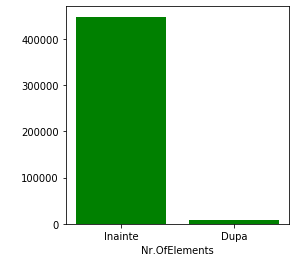

In [73]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
fig, ax = plt.subplots()
ax.bar(["Inainte", "Dupa"],v, color="green")
ax.set(xlabel="Nr.OfElements", ylabel=" ");

    - Eliminare cuvinte neinformative (stopwords)- s-au eliminat cuvinte predefinite din limba engleza existente in CountVectorizer (stop_words='english') si eliminarea cuvintelor care nu au mai mult de 5 aparitii 

In [74]:
vect2 = CountVectorizer(min_df=5,stop_words='english')
vect2.fit_transform(text)
print("Numarul de cuvinte dupa eliniarea cuvintelor neinformative:", len(vect2.vocabulary_))

Numarul de cuvinte dupa eliniarea cuvintelor neinformative: 1603


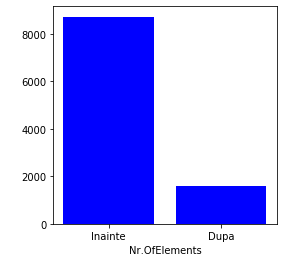

In [75]:
fig, ax = plt.subplots()
ax.bar(["Inainte", "Dupa"],[v[1], len(vect2.vocabulary_)], color="blue")
ax.set(xlabel="Nr.OfElements", ylabel=" ");

# 4
### LogisticRegresion

Regresia logistică este utilizată pentru a descrie datele și pentru a explica relația dintre o variabilă binară dependentă și una sau mai multe variabile independente la nivel nominal, ordinal, interval sau independent.
Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- C: float, optional (default=1.0) paramatru de regularizare; trebuie să fie un flotant pozitiv. Ca și în mașinile vectoriale de suport, valorile mai mici specifică o regularizare mai puternică.


### KNeighborsRegressor

Algoritmul k-NN este o metodă neparametrizata utilizată pentru clasificare și regresie. În ambele cazuri, intrarea constă în exemplele de instruire k cele mai apropiate din spațiul caracteristic. Producția depinde de faptul dacă k-NN este folosit pentru clasificare sau regresie: in regresia k-NN, ieșirea este valoarea proprietății pentru obiect. Această valoare reprezintă media valorilor celor mai apropiați vecini. k-NN este un tip de învățare bazată pe instanțe sau învățare leneșă, în care funcția este aproximată doar la nivel local și toate calculele sunt amânate până la clasificare. Algoritmul k-NN este printre cei mai simpli dintre toți algoritmi de învățare a mașinilor.

Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- s-a cautat optimizarea pentru parametrii :
    - n_neighbors : int, optional (default = 5): Numărul de vecini care vor fi utilizați în mod implicit pentru interogările k_neighbors.
    - p : int, optional (default = 2). Atunci când p = 1, aceasta este echivalentă cu utilizarea manhattan_distance (l1) și a duratei euclidiene (l2) pentru p = 2. Pentru p arbitrar, se utilizează minkowski_distance (l_p). Dar in cazul intrarilor de tip text nu se poate lua in considere utilizarea  minkowski_distance.

### DecisionTreeRegressor

Decision Trees (DTs) sunt o metodă de învățare neparametrică supravegheată folosită pentru clasificare și regresie. Scopul este de a crea un model care prezice valoarea unei variabile țintă prin învățarea unor simple reguli de decizie deduse din caracteristicile de date. De asemenea, arborii de decizie pot fi aplicați și pentru problemele de regresie, utilizând clasa DecisionTreeRegressor. Ca și în setarea de clasificare, metoda de potrivire va lua ca arhitecturi de argument X și y, numai că în acest caz y este de așteptat să aibă valori în virgulă mobilă în loc de valori întregi. Putem observa că dacă adâncimea maximă a copacului (controlată de parametrul max_depth) este setată prea înaltă, arborii de decizie învață detalii prea fine ale datelor de antrenament și învață din noise, adică se suprapun.

Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- s-a cautat optimizarea pentru parametrii :
    - max_features : int, float, string or None, optional (default=None) Numărul de caracteristici care trebuie luate în considerare atunci când căutați cea mai bună împărțire.
    - min_samples_split : int, optional (default=2).Numărul minim de eșantioane necesare pentru divizarea unui nod intern.
    -  min_samples_leaf : int, optional (default=1). Numărul minim de eșantioane necesare la un nod frunza.

### MLPRegressor

Un perceptron multistrat (MLP) este o clasă a rețelei neuronale artificiale. Un MLP constă din cel puțin trei straturi de noduri: un strat de intrare, un strat ascuns și un strat de ieșire. Cu excepția nodurilor de intrare, fiecare nod este un neuron care utilizează o funcție de activare neliniară. MLP utilizează o tehnică de învățare supervizata numită backpropagation pentru formare. Straturile sale multiple și activarea neliniară disting MLP de un perceptron liniar. Poate distinge date care nu pot fi separate liniar.
Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- s-a cautat optimizarea pentru parametrii :
    - activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’.Funcția de activare pentru stratul ascuns."identity", activare no-op, returnează f (x) = x "logistic", funcția sigmoid logistică, returnează f (x) = 1 / (1 + exp (-x)). "tanh", funcția tan hiperbolică, returnează f (x) = tanh (x). "relu", funcția liniară rectificată, returnează f (x) = max (0, x)
    - solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’.Solver pentru optimizarea greutății.
    - alpha : float, optional, default 0.0001. Valoarea penalizării L2 (termenul de regularizare).